# __EDA - Szczegółowa analiza cech__

## _importy / definicje_

Importy

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Zbiór danych

In [6]:
df = pd.read_csv('../repo/loan_data.csv')
df.sample(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
39154,24.0,female,Bachelor,38584.0,5,RENT,1279.0,EDUCATION,9.47,0.03,2.0,711,No,0
8211,23.0,female,High School,68185.0,0,MORTGAGE,4500.0,PERSONAL,11.83,0.07,4.0,618,Yes,0
28076,29.0,male,Associate,76766.0,4,RENT,10000.0,PERSONAL,15.33,0.13,7.0,636,Yes,0
27521,28.0,male,Bachelor,96831.0,7,RENT,15000.0,MEDICAL,13.49,0.15,5.0,652,Yes,0
27704,33.0,female,Master,190978.0,10,MORTGAGE,15000.0,PERSONAL,16.32,0.08,5.0,633,No,1


Użyteczne funkcje

In [7]:
def get_column_description(df):
    df_desc = df.describe()
    df_desc['missing'] = df.isna().sum()
    df_desc['unique'] = len(df.unique())
    df_desc = df_desc.rename({
        '25%' : 'Q1',
        '50%' : 'median',
        '75%' : 'Q3'
    })
    df_desc = df_desc.reindex(['count', 'missing', 'unique', 'mean', 'min', 'Q1', 'median', 'Q3', 'max', 'std'])
    df_desc = df_desc.dropna()
    
    return df_desc

In [8]:
def get_value_counts(df):
    df_v_counts = df.value_counts()
    index_name = df_v_counts.index.name
    
    df_v_counts = df_v_counts.to_frame().reset_index()
    df_v_counts['count_percent'] = np.round((df_v_counts['count'] / df_v_counts['count'].sum()) * 100, 2)

    df_v_counts = df_v_counts.sort_values(index_name)
    return df_v_counts

In [9]:
def get_value_count_distribution(df, distribution_lvls):
    df_v_counts = df.value_counts().sort_index()

    index_name = df_v_counts.index.name
    index_group_name = index_name + '_group'

    df_min = (-1) * np.inf
    df_max = np.inf 

    bins = [df_min] + distribution_lvls + [df_max]

    df_v_counts = df_v_counts.to_frame()
    
    df_v_counts[index_group_name] = pd.cut(df_v_counts.index, bins=bins, include_lowest=True)
    df_v_counts = df_v_counts.reset_index().drop(columns=index_name)

    df_vc_distribution = df_v_counts.groupby(by=index_group_name).sum().reset_index()
    df_vc_distribution['count_percent'] = np.round((df_vc_distribution['count'] / df_vc_distribution['count'].sum()) * 100, 2)
    df_vc_distribution[index_group_name] = df_vc_distribution[index_group_name].astype(str)

    return df_vc_distribution

In [10]:
def plot_count_histogram(df, ax):
    x_axis_column = df.columns[0]

    # Oś X
    ax.bar(df[x_axis_column], df['count'], width=0.4, label='Count')
    ax.set_xlabel(f'{x_axis_column}')
    ax.set_xticklabels(df[x_axis_column], rotation=45, ha='right')
    
    # Lewa Oś Y
    ax.set_ylabel('count', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    ax.grid(True, which='major', axis='y', color='blue', linestyle='--', alpha=0.5)

    # Prawa oś Y
    ax2 = ax.twinx()
    ax2.bar(df[x_axis_column], df['count_percent'], width=0.4, label='Count %')
    ax2.set_ylabel('total count (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.grid(True, which='major', axis='y', color='red', linestyle='--', alpha=0.15)

    ax.set_title(f'{x_axis_column} count')

In [11]:
def show_count_histogram(df):
    x_axis_column = df.columns[0]

    fig, ax1 = plt.subplots(figsize=(8, 5))
    
    # Oś X
    ax1.bar(df[x_axis_column], df['count'], color='blue', width=0.4, label='Count')
    ax1.set_xlabel(f'{x_axis_column}')
    plt.xticks(rotation=45, ha='right')
    
    # Lewa oś Y
    ax1.set_ylabel('count', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True, which='major', axis='y', color='blue', linestyle='--', alpha=0.5)

    # Prawa oś Y
    ax2 = ax1.twinx()
    ax2.bar(df[x_axis_column], df['count_percent'], width=0.4, label='Count Percent')
    ax2.set_ylabel('total count (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.grid(True, which='major', axis='y', color='red', linestyle='--', alpha=0.15)

    # Wstawienie wykresu
    plt.title(f'{x_axis_column} (count and total count percent)')
    fig.tight_layout()
    plt.show()

In [12]:
def show_kde_histogram(df, column_name, bin_count):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], bins=bin_count, kde=True)
    plt.title(column_name + ' distribution')
    plt.axvline(df[column_name].mean(), color='r', linestyle='--', label='Mean')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

## Struktura zbioru
Rozmiar zbioru: _45000 wierszy_ __x__ _14 kolumn_

Cechy:
* person_age
* person_gender
* person_education
* person_income
* person_emp_exp
* person_home_ownership
* loan_amnt
* loan_intent
* loan_int_rate
* loan_percent_income
* cb_person_cred_hist_length
* credit_score
* previous_loan_defaults_on_file
* __loan_status__ _(cecha docelowa)_

In [13]:
display(list(df.columns))
print(f'Column count = {len(list(df.columns))}')
print(f'Row count = {df.shape[0]}')

['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'person_home_ownership',
 'loan_amnt',
 'loan_intent',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file',
 'loan_status']

Column count = 14
Row count = 45000


## Analiza Cech

### __1. person_age__ - wiek klienta

#### 1.1. Opis ogólny

In [14]:
df_p_age_desc = get_column_description(df['person_age'])
display(df_p_age_desc)

count      45000.000000
missing        0.000000
unique        60.000000
mean          27.764178
min           20.000000
Q1            24.000000
median        26.000000
Q3            30.000000
max          144.000000
std            6.045108
Name: person_age, dtype: float64

#### 1.2. Rozkłady wartości

In [15]:
df_p_age = get_value_counts(df['person_age'])
display(df_p_age)

,person_age,count,count_percent
38,20.0,17,0.04
11,21.0,1289,2.86
3,22.0,4236,9.41
0,23.0,5254,11.68
1,24.0,5138,11.42
2,25.0,4507,10.02
4,26.0,3659,8.13
5,27.0,3095,6.88
6,28.0,2728,6.06
7,29.0,2455,5.46


In [16]:
df_p_age_dist = get_value_count_distribution(df['person_age'], [20,21,23,26,30,35,40,50,65])
display(df_p_age_dist)

C:\Users\abart\AppData\Local\Temp\ipykernel_29288\3569808304.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_vc_distribution = df_v_counts.groupby(by=index_group_name).sum().reset_index()


,person_age_group,count,count_percent
0,"(-inf, 20.0]",17,0.04
1,"(20.0, 21.0]",1289,2.86
2,"(21.0, 23.0]",9490,21.09
3,"(23.0, 26.0]",13304,29.56
4,"(26.0, 30.0]",10299,22.89
5,"(30.0, 35.0]",6115,13.59
6,"(35.0, 40.0]",2647,5.88
7,"(40.0, 50.0]",1511,3.36
8,"(50.0, 65.0]",289,0.64
9,"(65.0, inf]",39,0.09


#### 1.3. Wykresy rozkładów

C:\Users\abart\AppData\Local\Temp\ipykernel_29288\3251628082.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df[x_axis_column], rotation=45, ha='right')
C:\Users\abart\AppData\Local\Temp\ipykernel_29288\3251628082.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df[x_axis_column], rotation=45, ha='right')


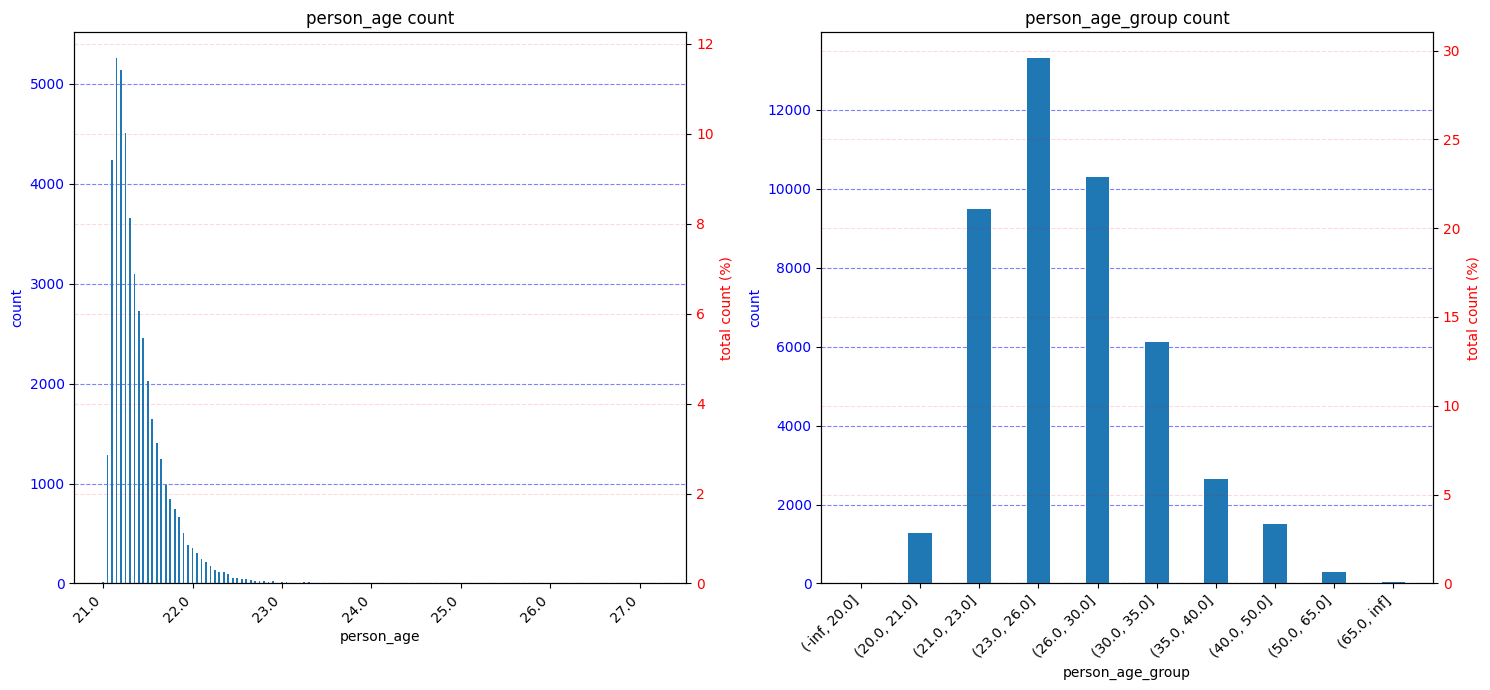

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

plot_count_histogram(df_p_age, axes[0])
plot_count_histogram(df_p_age_dist, axes[1])

plt.tight_layout()
plt.show()

### __2. person_gender__ - płeć klienta

#### 2.1. Opis ogólny

In [18]:
df_p_gender_desc = get_column_description(df['person_gender'])
display(df_p_gender_desc)

count      45000
missing        0
unique         2
Name: person_gender, dtype: object

#### 2.2. Rozkład wartości

In [19]:
df_p_gender = get_value_counts(df['person_gender'])
display(df_p_gender.sort_values('count', ascending=False))

,person_gender,count,count_percent
0,male,24841,55.2
1,female,20159,44.8


#### 2.3. Wykres

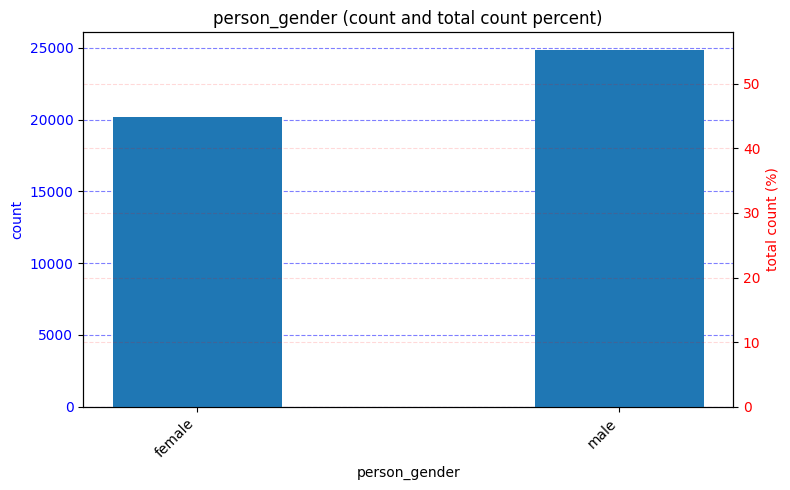

In [20]:
show_count_histogram(df_p_gender)

### __3. person_education__ - wykształcenie klienta

#### 3.1. Opis ogólny

In [21]:
df_p_education_desc = get_column_description(df['person_education'])
display(df_p_education_desc)

count      45000
missing        0
unique         5
Name: person_education, dtype: object

#### 3.2. Rozkład wartości

In [22]:
df_p_education = get_value_counts(df['person_education'])
display(df_p_education.sort_values('count', ascending=False))

,person_education,count,count_percent
0,Bachelor,13399,29.78
1,Associate,12028,26.73
2,High School,11972,26.60
3,Master,6980,15.51
4,Doctorate,621,1.38


#### 3.3. Wykres

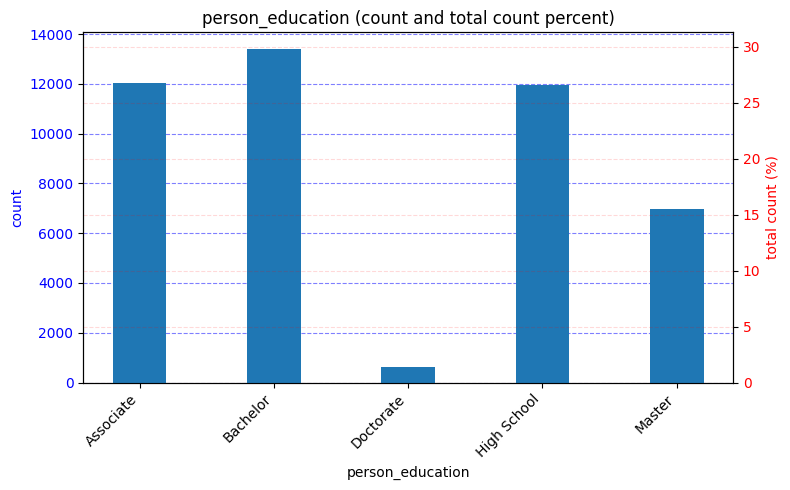

In [23]:
show_count_histogram(df_p_education)

### __4. person_income__ - dochód klienta

#### 4.1. Opis ogólny

In [24]:
df_p_income_desc = get_column_description(df['person_income'])
display(df_p_income_desc)

count      4.500000e+04
missing    0.000000e+00
unique     3.398900e+04
mean       8.031905e+04
min        8.000000e+03
Q1         4.720400e+04
median     6.704800e+04
Q3         9.578925e+04
max        7.200766e+06
std        8.042250e+04
Name: person_income, dtype: float64

#### 4.2. Rozkład wartości

In [25]:
df_p_income_dist = get_value_count_distribution(df['person_income'], [10000, 25000, 50000, 75000, 100000, 200000, 400000])
display(df_p_income_dist)

C:\Users\abart\AppData\Local\Temp\ipykernel_29288\3569808304.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_vc_distribution = df_v_counts.groupby(by=index_group_name).sum().reset_index()


,person_income_group,count,count_percent
0,"(-inf, 10000.0]",31,0.07
1,"(10000.0, 25000.0]",1526,3.39
2,"(25000.0, 50000.0]",11490,25.53
3,"(50000.0, 75000.0]",13348,29.66
4,"(75000.0, 100000.0]",8581,19.07
5,"(100000.0, 200000.0]",8781,19.51
6,"(200000.0, 400000.0]",1078,2.40
7,"(400000.0, inf]",165,0.37


#### 4.3. Wykres

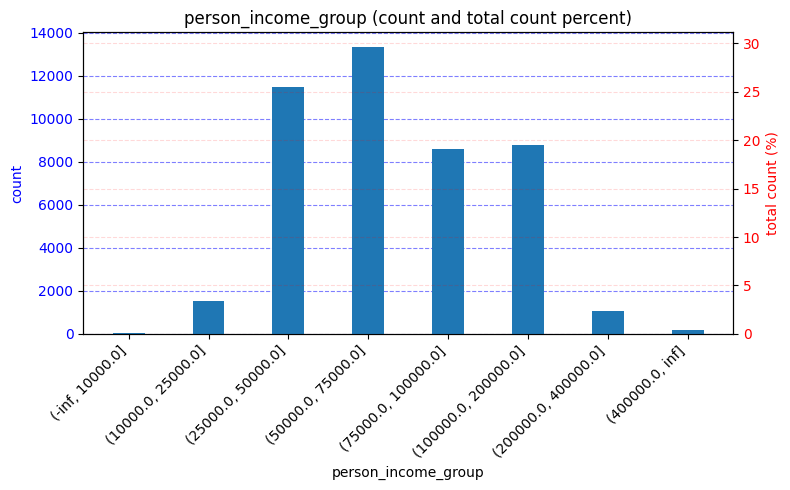

In [26]:
show_count_histogram(df_p_income_dist)

### __5. person_emp_exp__ - doświadczenie zawodowe klienta

#### 5.1. Opis ogólny

In [27]:
df_p_emp_exp_desc = get_column_description(df['person_emp_exp'])
display(df_p_emp_exp_desc)

count      45000.000000
missing        0.000000
unique        63.000000
mean           5.410333
min            0.000000
Q1             1.000000
median         4.000000
Q3             8.000000
max          125.000000
std            6.063532
Name: person_emp_exp, dtype: float64

#### 5.2. Rozkłady wartości

In [28]:
df_p_emp_exp = get_value_counts(df['person_emp_exp'])
display(df_p_emp_exp)

,person_emp_exp,count,count_percent
0,0,9566,21.26
2,1,4061,9.02
1,2,4134,9.19
3,3,3890,8.64
4,4,3524,7.83
...,...,...,...
53,100,1,0.00
54,101,1,0.00
51,121,1,0.00
55,124,1,0.00


In [29]:
df_p_emp_exp_dist = get_value_count_distribution(df['person_emp_exp'], [0, 1, 2, 3, 5, 10])
display(df_p_emp_exp_dist)

C:\Users\abart\AppData\Local\Temp\ipykernel_29288\3569808304.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_vc_distribution = df_v_counts.groupby(by=index_group_name).sum().reset_index()


,person_emp_exp_group,count,count_percent
0,"(-inf, 0.0]",9566,21.26
1,"(0.0, 1.0]",4061,9.02
2,"(1.0, 2.0]",4134,9.19
3,"(2.0, 3.0]",3890,8.64
4,"(3.0, 5.0]",6524,14.50
5,"(5.0, 10.0]",9769,21.71
6,"(10.0, inf]",7056,15.68


#### 5.3. Wykresy

C:\Users\abart\AppData\Local\Temp\ipykernel_29288\3251628082.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df[x_axis_column], rotation=45, ha='right')
C:\Users\abart\AppData\Local\Temp\ipykernel_29288\3251628082.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df[x_axis_column], rotation=45, ha='right')


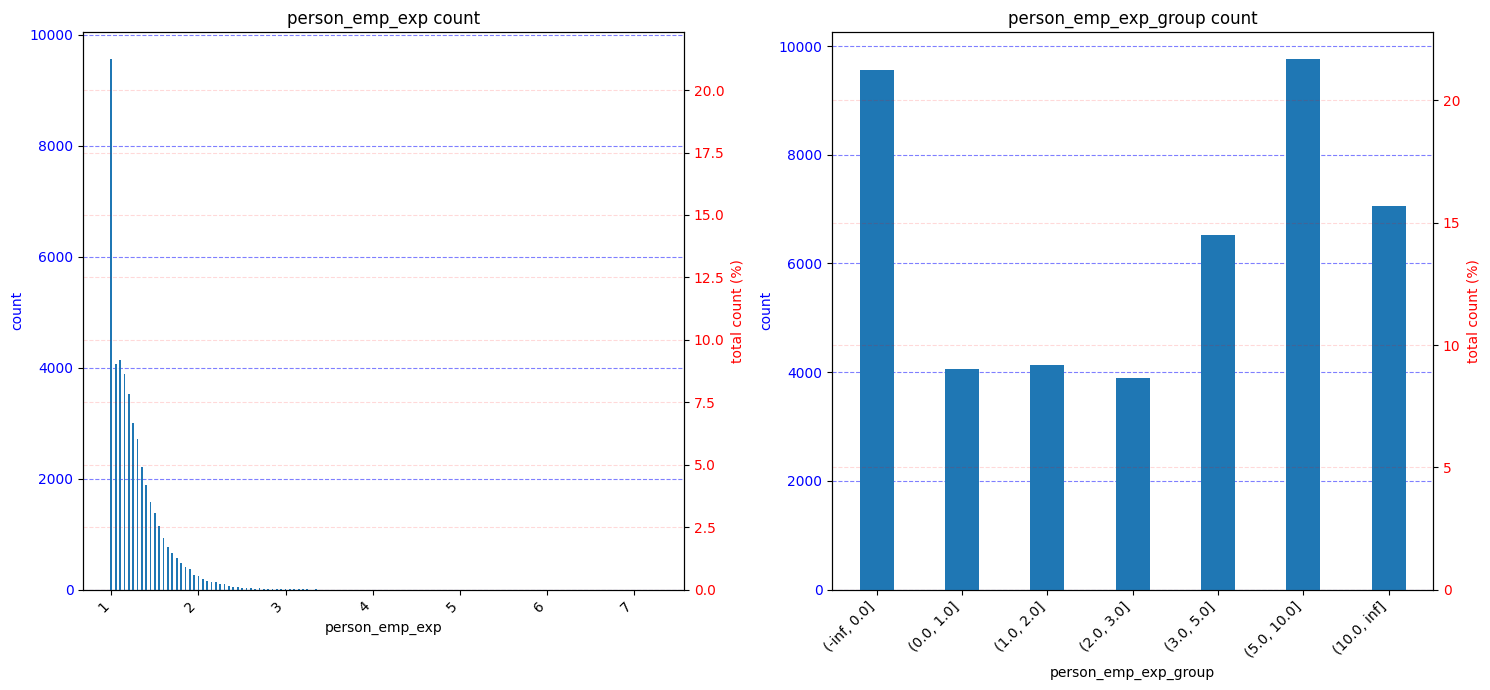

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

plot_count_histogram(df_p_emp_exp, axes[0])
plot_count_histogram(df_p_emp_exp_dist, axes[1])

plt.tight_layout()
plt.show()

### __6. person_home_ownership__ - status posiadania nieruchomości

#### 6.1. Opis ogólny

In [31]:
df_p_home_ownship_desc = get_column_description(df['person_home_ownership'])
display(df_p_home_ownship_desc)

count      45000
missing        0
unique         4
Name: person_home_ownership, dtype: object

#### 6.2. Rozkład wartości

In [32]:
df_p_home_ownship = get_value_counts(df['person_home_ownership'])
display(df_p_home_ownship)

,person_home_ownership,count,count_percent
1,MORTGAGE,18489,41.09
3,OTHER,117,0.26
2,OWN,2951,6.56
0,RENT,23443,52.10


#### 6.3. Wykres

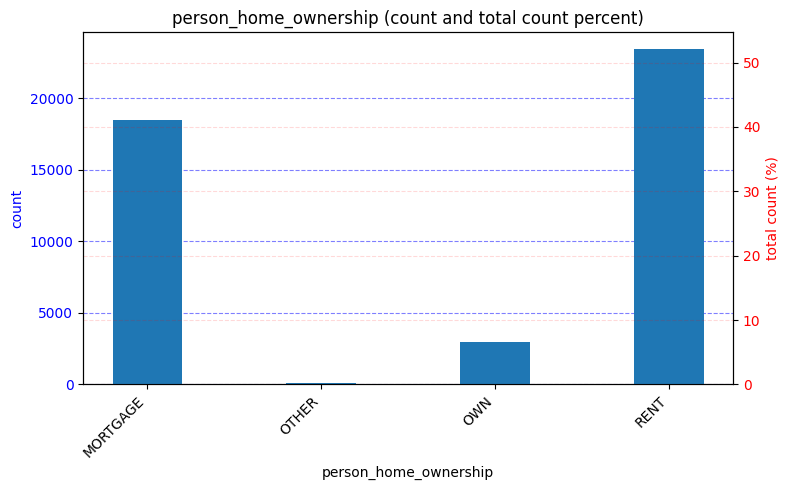

In [33]:
show_count_histogram(df_p_home_ownship)

### __7. loan_amnt__ - aktualna wysokość długu klienta

#### 7.1. Opis ogólny

In [34]:
df_l_amnt_desc = get_column_description(df['loan_amnt'])
display(df_l_amnt_desc)

count      45000.000000
missing        0.000000
unique      4483.000000
mean        9583.157556
min          500.000000
Q1          5000.000000
median      8000.000000
Q3         12237.250000
max        35000.000000
std         6314.886691
Name: loan_amnt, dtype: float64

#### 7.2. Rozkład wartości

In [35]:
df_l_amnt_dist = get_value_count_distribution(df['loan_amnt'], [2000, 4000, 6000, 8000, 10000, 14000, 20000])
display(df_l_amnt_dist)

C:\Users\abart\AppData\Local\Temp\ipykernel_29288\3569808304.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_vc_distribution = df_v_counts.groupby(by=index_group_name).sum().reset_index()


,loan_amnt_group,count,count_percent
0,"(-inf, 2000.0]",2423,5.38
1,"(2000.0, 4000.0]",6109,13.58
2,"(4000.0, 6000.0]",8339,18.53
3,"(6000.0, 8000.0]",6360,14.13
4,"(8000.0, 10000.0]",6510,14.47
5,"(10000.0, 14000.0]",5844,12.99
6,"(14000.0, 20000.0]",6423,14.27
7,"(20000.0, inf]",2992,6.65


#### 7.3. Wykres

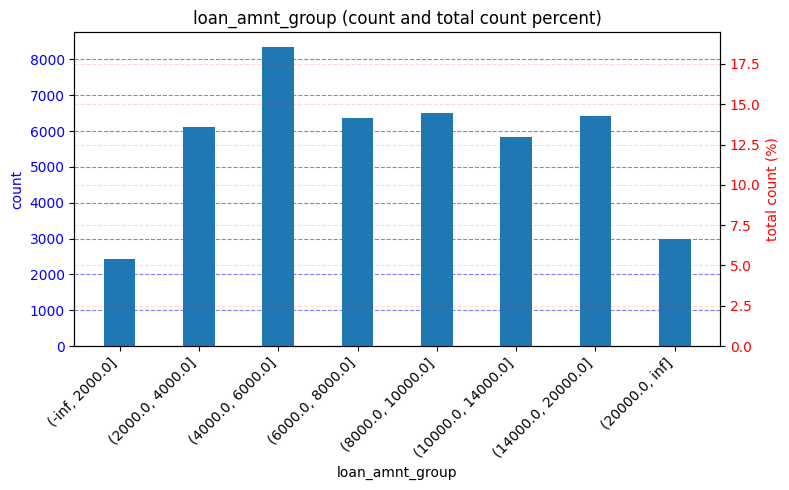

In [36]:
show_count_histogram(df_l_amnt_dist)

### __8. loan_intent__ - cel kredytu

#### 8.1. Opis ogólny

In [37]:
df_l_intent_desc = get_column_description(df['loan_intent'])
display(df_l_intent_desc)

count      45000
missing        0
unique         6
Name: loan_intent, dtype: object

#### 8.2. Rozkład wartości

In [38]:
df_l_intent = get_value_counts(df['loan_intent'])
display(df_l_intent)

,loan_intent,count,count_percent
4,DEBTCONSOLIDATION,7145,15.88
0,EDUCATION,9153,20.34
5,HOMEIMPROVEMENT,4783,10.63
1,MEDICAL,8548,19.00
3,PERSONAL,7552,16.78
2,VENTURE,7819,17.38


#### 8.3. Wykres

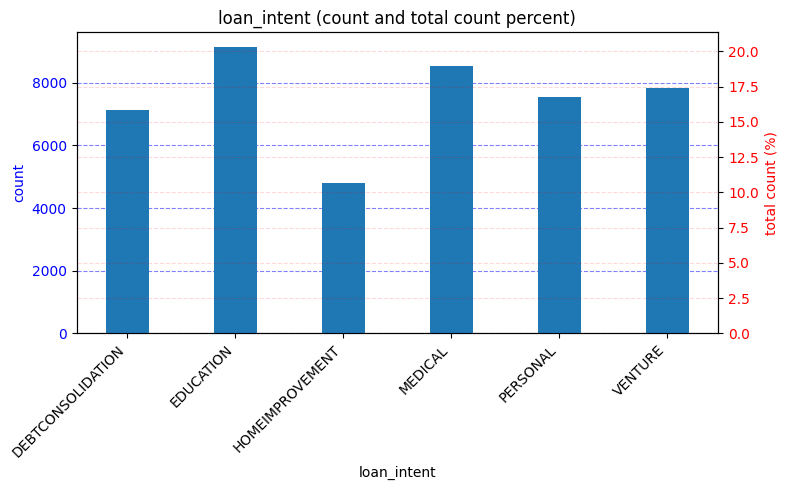

In [39]:
show_count_histogram(df_l_intent)

### __9. loan_int_rate__ - stopa procentowa kredytu

#### 9.1. Opis ogólny

In [40]:
df_l_int_rate_desc = get_column_description(df['loan_int_rate'])
display(df_l_int_rate_desc)

count      45000.000000
missing        0.000000
unique      1302.000000
mean          11.006606
min            5.420000
Q1             8.590000
median        11.010000
Q3            12.990000
max           20.000000
std            2.978808
Name: loan_int_rate, dtype: float64

#### 9.2. Rozkład wartości

In [41]:
df_l_int_rate = get_value_count_distribution(df['loan_int_rate'],[6, 8, 10, 12, 15])
display(df_l_int_rate)

C:\Users\abart\AppData\Local\Temp\ipykernel_29288\3569808304.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_vc_distribution = df_v_counts.groupby(by=index_group_name).sum().reset_index()


,loan_int_rate_group,count,count_percent
0,"(-inf, 6.0]",1545,3.43
1,"(6.0, 8.0]",8485,18.86
2,"(8.0, 10.0]",6013,13.36
3,"(10.0, 12.0]",13635,30.30
4,"(12.0, 15.0]",10852,24.12
5,"(15.0, inf]",4470,9.93


#### 9.3. Wykres

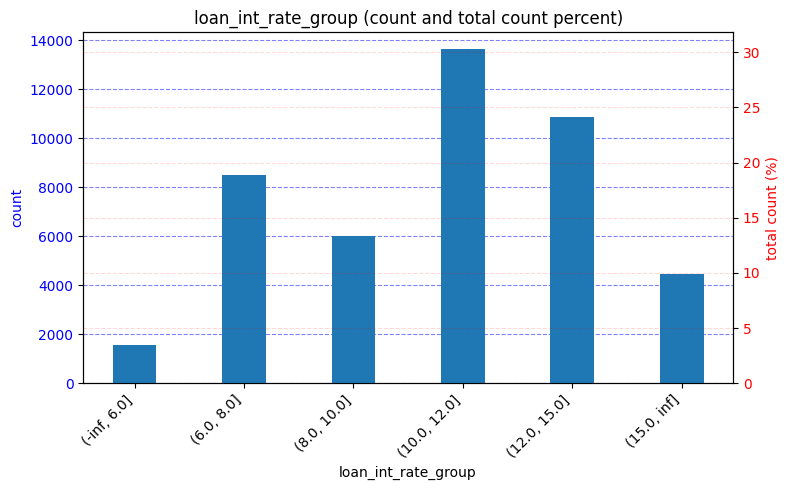

In [42]:
show_count_histogram(df_l_int_rate)

### __10. loan_percent_income__ - stosunek kredytu do rocznego dochodu (w procentach)

#### 10.1. Opis ogólny

In [43]:
df_l_percent_income_desc = get_column_description(df['loan_percent_income'])
display(df_l_percent_income_desc)

count      45000.000000
missing        0.000000
unique        64.000000
mean           0.139725
min            0.000000
Q1             0.070000
median         0.120000
Q3             0.190000
max            0.660000
std            0.087212
Name: loan_percent_income, dtype: float64

#### 10.2. Rozkłady wartości

In [44]:
df_l_percent_income = get_value_counts(df['loan_percent_income'])
display(df_l_percent_income)

,loan_percent_income,count,count_percent
44,0.00,27,0.06
30,0.01,315,0.70
19,0.02,944,2.10
13,0.03,1488,3.31
9,0.04,1950,4.33
...,...,...,...
63,0.59,1,0.00
57,0.61,2,0.00
58,0.62,2,0.00
62,0.63,1,0.00


In [45]:
df_l_percent_income_dist = get_value_count_distribution(df['loan_percent_income'], [0.05, 0.10, 0.15, 0.25, 0.3])
display(df_l_percent_income_dist)

C:\Users\abart\AppData\Local\Temp\ipykernel_29288\3569808304.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_vc_distribution = df_v_counts.groupby(by=index_group_name).sum().reset_index()


,loan_percent_income_group,count,count_percent
0,"(-inf, 0.05]",6900,15.33
1,"(0.05, 0.1]",11966,26.59
2,"(0.1, 0.15]",9981,22.18
3,"(0.15, 0.25]",11125,24.72
4,"(0.25, 0.3]",2628,5.84
5,"(0.3, inf]",2400,5.33


#### 10.3. Wykresy

C:\Users\abart\AppData\Local\Temp\ipykernel_29288\3251628082.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df[x_axis_column], rotation=45, ha='right')
C:\Users\abart\AppData\Local\Temp\ipykernel_29288\3251628082.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df[x_axis_column], rotation=45, ha='right')


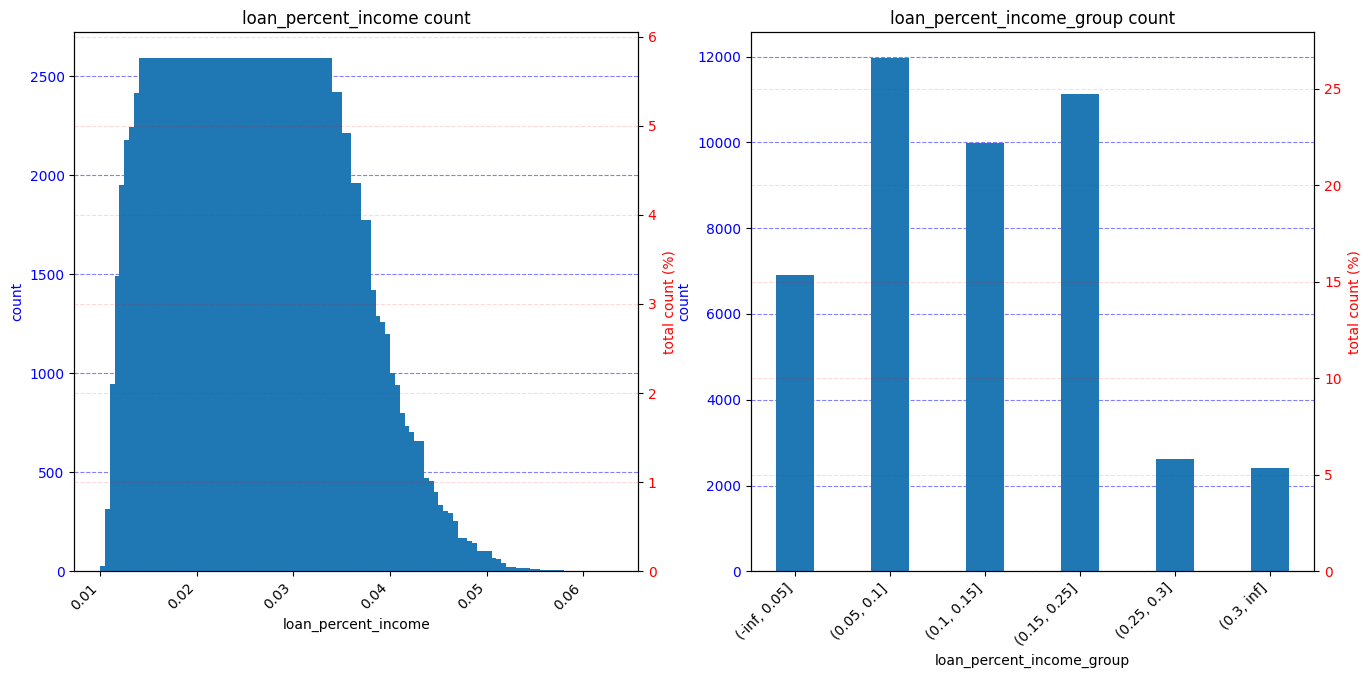

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

plot_count_histogram(df_l_percent_income, axes[0])
plot_count_histogram(df_l_percent_income_dist, axes[1])

fig.tight_layout
plt.show()

### __11. cb_person_cred_hist_length__ - całkowita historia zadłużenia (liczona w latach)

#### 11.1. Opis ogólny

In [47]:
df_cb_person_cred_hist_length_desc = get_column_description(df['cb_person_cred_hist_length'])
display(df_cb_person_cred_hist_length_desc)

count      45000.000000
missing        0.000000
unique        29.000000
mean           5.867489
min            2.000000
Q1             3.000000
median         4.000000
Q3             8.000000
max           30.000000
std            3.879702
Name: cb_person_cred_hist_length, dtype: float64

#### 11.2. Rozkłady wartości

In [48]:
df_cb_p_cred_hist_length = get_value_counts(df['cb_person_cred_hist_length'])
display(df_cb_p_cred_hist_length)

,cb_person_cred_hist_length,count,count_percent
2,2.0,6537,14.53
1,3.0,8312,18.47
0,4.0,8653,19.23
3,5.0,3082,6.85
4,6.0,2966,6.59
5,7.0,2889,6.42
6,8.0,2800,6.22
7,9.0,2685,5.97
8,10.0,2457,5.46
10,11.0,712,1.58


In [49]:
df_cb_p_cred_hist_length_dist = get_value_count_distribution(df['cb_person_cred_hist_length'], [2,3,4,6,8,12])
display(df_cb_p_cred_hist_length_dist)

C:\Users\abart\AppData\Local\Temp\ipykernel_29288\3569808304.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_vc_distribution = df_v_counts.groupby(by=index_group_name).sum().reset_index()


,cb_person_cred_hist_length_group,count,count_percent
0,"(-inf, 2.0]",6537,14.53
1,"(2.0, 3.0]",8312,18.47
2,"(3.0, 4.0]",8653,19.23
3,"(4.0, 6.0]",6048,13.44
4,"(6.0, 8.0]",5689,12.64
5,"(8.0, 12.0]",6569,14.60
6,"(12.0, inf]",3192,7.09


#### 11.3. Wykresy

C:\Users\abart\AppData\Local\Temp\ipykernel_29288\3251628082.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df[x_axis_column], rotation=45, ha='right')
C:\Users\abart\AppData\Local\Temp\ipykernel_29288\3251628082.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df[x_axis_column], rotation=45, ha='right')


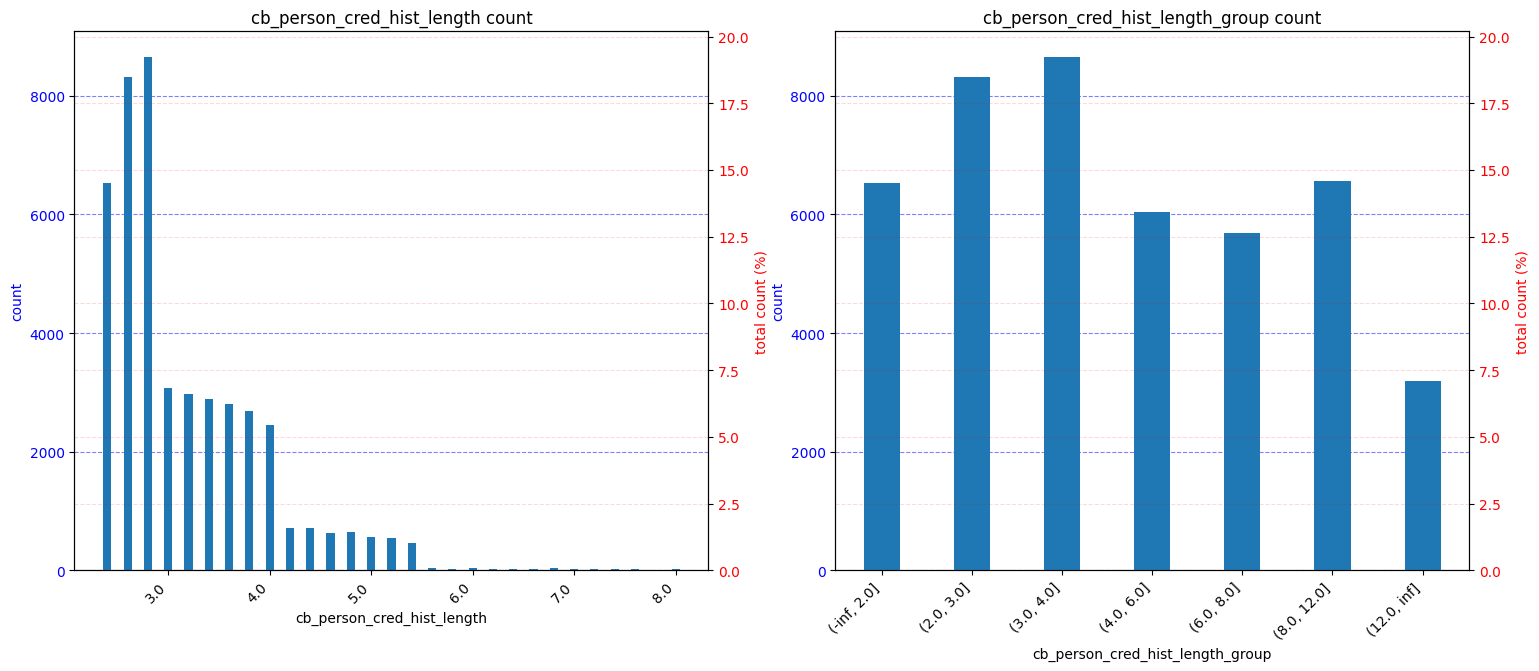

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

plot_count_histogram(df_cb_p_cred_hist_length, axes[0])
plot_count_histogram(df_cb_p_cred_hist_length_dist, axes[1])

fig.tight_layout
plt.show()

### __12. credit_score__ - punktacja kredytowa

#### 12.1. Opis ogólny

In [51]:
df_credit_score_desc = get_column_description(df['credit_score'])
display(df_credit_score_desc)

count      45000.000000
missing        0.000000
unique       340.000000
mean         632.608756
min          390.000000
Q1           601.000000
median       640.000000
Q3           670.000000
max          850.000000
std           50.435865
Name: credit_score, dtype: float64

#### 12.2. Rozkład wartości

In [52]:
df_credit_score_dist = get_value_count_distribution(df['credit_score'], [500, 600, 650, 700])
display(df_credit_score_dist)

C:\Users\abart\AppData\Local\Temp\ipykernel_29288\3569808304.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_vc_distribution = df_v_counts.groupby(by=index_group_name).sum().reset_index()


,credit_score_group,count,count_percent
0,"(-inf, 500.0]",529,1.18
1,"(500.0, 600.0]",10520,23.38
2,"(600.0, 650.0]",15481,34.40
3,"(650.0, 700.0]",15771,35.05
4,"(700.0, inf]",2699,6.00


#### 12.3. Wykres

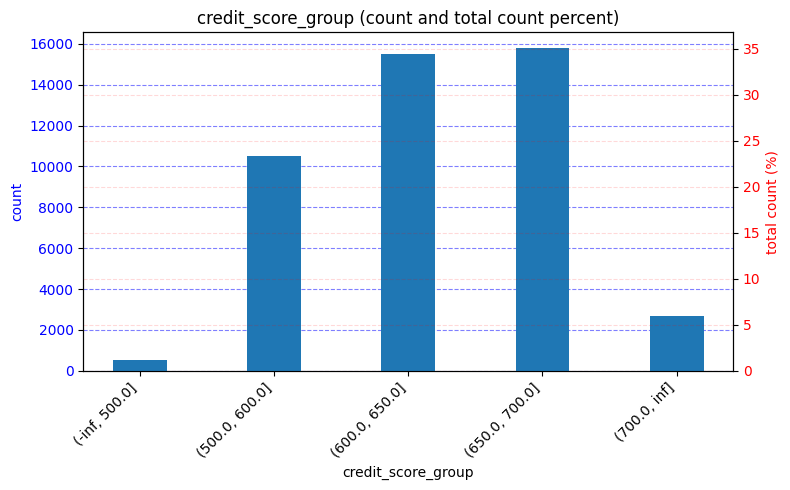

In [53]:
show_count_histogram(df_credit_score_dist)

### __13. previous_loan_defaults_on_file__ - czy posiada poprzednie długi do spłacenia

#### 13.1. Opis ogólny

In [54]:
df_prev_loan_defaults_on_file_desc = get_column_description(df['previous_loan_defaults_on_file'])
display(df_prev_loan_defaults_on_file_desc)

count      45000
missing        0
unique         2
Name: previous_loan_defaults_on_file, dtype: object

#### 13.2. Rozkład wartości

In [55]:
df_prev_loan_defaults_on_file = get_value_counts(df['previous_loan_defaults_on_file'])
display(df_prev_loan_defaults_on_file)

,previous_loan_defaults_on_file,count,count_percent
1,No,22142,49.2
0,Yes,22858,50.8


#### 13.3 Wykres

In [ ]:
show_count_histogram(df_prev_loan_defaults_on_file)

### __14. loan_status__ _(cecha docelowa)_ - przyjęcie / odrzucenie udzielenia kredytu

#### 14.1. Opis ogólny

In [ ]:
df_loan_status_desc = get_column_description(df['loan_status'])
display(df_loan_status_desc)

count      45000.000000
missing        0.000000
unique         2.000000
mean           0.222222
min            0.000000
Q1             0.000000
median         0.000000
Q3             0.000000
max            1.000000
std            0.415744
Name: loan_status, dtype: float64

#### 14.2. Rozkład wartości

In [ ]:
df_loan_status = get_value_counts(df['loan_status'])
display(df_loan_status)

,loan_status,count,count_percent
0,0,35000,77.78
1,1,10000,22.22


#### 14.3. Wykresy

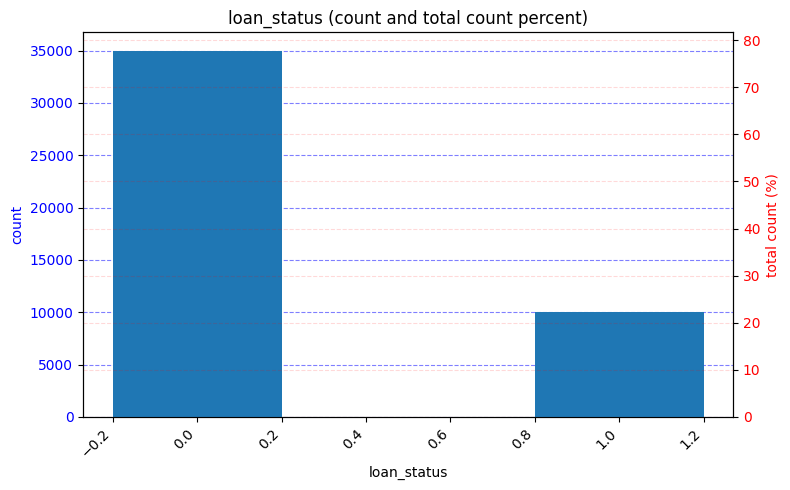

In [ ]:
show_count_histogram(df_loan_status)